In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

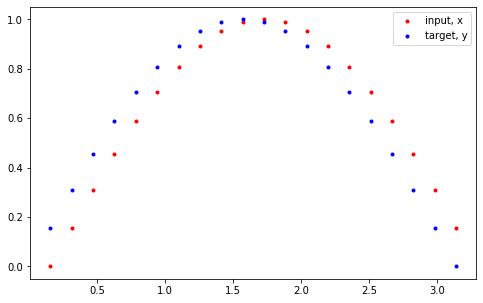

In [6]:
plt.figure(figsize=(8,5))
seq_length = 20

time_steps = np.linspace(0, np.pi, seq_length+1)#start, stop, num
data = np.sin(time_steps)
data.resize((seq_length + 1,1))

x = data[:-1]
y = data[1:]

plt.plot(time_steps[1:],x,'r.',label='input, x')
plt.plot(time_steps[1:],y,'b.',label='target, y')
plt.legend(loc='best')
plt.show()

In [16]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim,n_layers):
        super(RNN,self).__init__()
        self.hidden_dim = hidden_dim
        
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        #last Fc
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        # x(batch_size, seq_len, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        r_out, hidden = self.rnn(x,hidden)
        # output size (batch_size * seq_len, hidden_dim)
        r_out = r_out.view(-1,self.hidden_dim)
        
        #get final output
        output = self.fc(r_out)
        
        return output, hidden
        

In [18]:
test_rnn = RNN(input_size=1,output_size=1,hidden_dim=10, n_layers=2)

time_steps = np.linspace(0,np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length,1))

test_input = torch.Tensor(data).unsqueeze(0)
print('input size:', test_input.size())

#test out rnn sizes
test_out, test_h = test_rnn(test_input,None)
print('output size :',test_out.size())
print('hidden stats size : ',test_h.size())

input size: torch.Size([1, 20, 1])
output size : torch.Size([20, 1])
hidden stats size :  torch.Size([2, 1, 10])


In [19]:
# 하이퍼 파라메터
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

# instance
rnn = RNN(input_size, output_size, hidden_dim,n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [21]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [26]:
def train(rnn, n_steps, print_every):
    #hidden state 초기화
    hidden = None
    
    for batch_i, step in enumerate(range(n_steps)):
        time_steps = np.linspace(step*np.pi, (step+1)*np.pi, seq_length+1)
        data = np.sin(time_steps)
        data.resize((seq_length+1,1))
        
        x = data[:-1]
        y = data[1:]
        
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor=torch.Tensor(y)
        
        #outpust from the rnn
        prediction, hidden = rnn(x_tensor, hidden)
        hidden = hidden.data
        
        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_i & print_every==0:
            print('Loss : ', loss.item())
            plt.plot(time_steps[1:],x,'r.')
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(),'b.')
            plt.show()
        
    return rnn
        

Loss :  0.10256980359554291


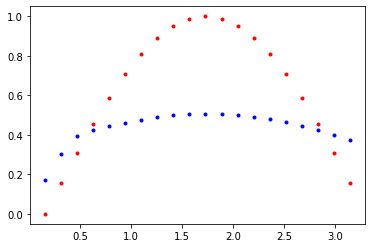

Loss :  0.00910318735986948


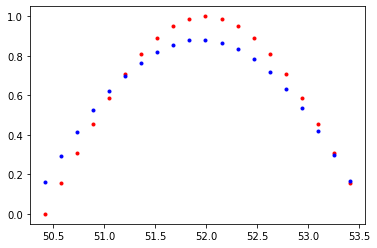

Loss :  0.009814928285777569


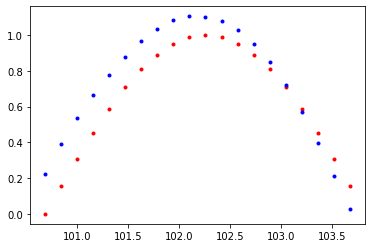

Loss :  0.000316552264848724


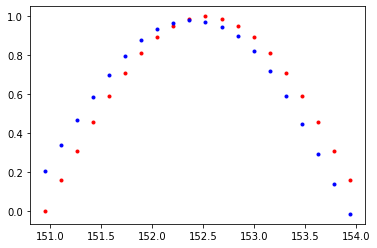

Loss :  0.00030377658549696207


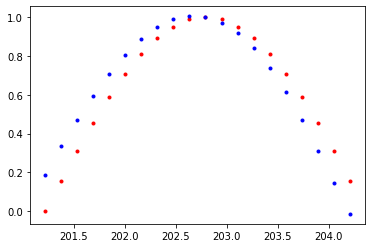

In [27]:
n_steps = 75
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)

In [23]:
np.linspace(1*np.pi, (1+1)*np.pi, seq_length+1)

array([3.14159265, 3.29867229, 3.45575192, 3.61283155, 3.76991118,
       3.92699082, 4.08407045, 4.24115008, 4.39822972, 4.55530935,
       4.71238898, 4.86946861, 5.02654825, 5.18362788, 5.34070751,
       5.49778714, 5.65486678, 5.81194641, 5.96902604, 6.12610567,
       6.28318531])